# Lead Score Case Study🔍

## Importing Dataset

In [144]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [145]:
# Loading the dataset and viewing it 
lead = pd.read_csv('Leads.csv')
lead.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [146]:
# Getting shape
lead.shape

(9240, 37)

In [147]:
# Getting info 
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [148]:
# describing the data 
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [149]:
# Columns of the dataframe
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Checking Nulls, wherein columns with more than 40% nulls will be dropped

In [150]:
# Getting percentage of nulls in respective variables

round(100*lead.isna().sum()/len(lead),2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [151]:
# Checking shape
lead.shape

(9240, 37)

In [152]:
# Dropping some unwanted columns as they have more than 40% nulls

for col in lead.columns:
    if 100*lead[col].isna().sum()/len(lead) > 40:
        lead = lead.drop(col, axis=1)
lead.shape

(9240, 32)

In [153]:
# Getting revised nulls percentage

round(100*lead.isna().sum()/len(lead),2).sort_values(ascending=False)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Prospect ID                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free cop

In [154]:
# Getting value_counts for all the columns 

for col in lead.columns:
    print(lead[col].value_counts(normalize=True)*100)
    print('-'*70)

7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.010823
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.010823
46befc49-253a-419b-abea-2fd978d2e2b1    0.010823
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.010823
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.010823
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.010823
644099a2-3da4-4d23-9546-7676340a372b    0.010823
2a093175-415b-4321-9e69-ed8d9df65a3c    0.010823
c66249a3-8500-4c66-a511-312d914573de    0.010823
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.010823
Name: Prospect ID, Length: 9240, dtype: float64
----------------------------------------------------------------------
660737    0.010823
603303    0.010823
602561    0.010823
602557    0.010823
602540    0.010823
            ...   
630422    0.010823
630405    0.010823
630403    0.010823
630390    0.010823
579533    0.010823
Name: Lead Number, Length: 9240, dtype: float64
----------------------------------------------------------------------
Landing Page S

In [155]:
# Some columns have 100% "No". So, there is no use of these columns and this may skew our analysis
# These columns do not have ny variety so there is no use of keeping these columns

lead = lead.drop(['Magazine','Newspaper Article','Digital Advertisement','Through Recommendations',
                 'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','X Education Forums',
                 'What matters most to you in choosing a course','Newspaper','Search','Lead Profile',
                  'How did you hear about X Education','Do Not Email','Do Not Call'], axis=1)
lead.shape

(9240, 16)

In [156]:
# As there are many columns which have 'Select' option which is nothing but nulls so replacing 'select' with nulls

lead = lead.replace('Select', np.NaN)

In [157]:
round(100*lead.isna().sum()/len(lead),2).sort_values(ascending=False) #Cheking null percentage again

City                                      39.71
Specialization                            36.58
Tags                                      36.29
What is your current occupation           29.11
Country                                   26.63
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [158]:
# Removing rows which have nulls in tags column

lead = lead[~(pd.isnull(lead['City']))]

In [159]:
# Revised nulls

round(100*lead.isna().sum()/len(lead),2).sort_values(ascending=False)

Tags                                      26.12
What is your current occupation           22.80
Country                                    7.29
Specialization                             3.54
TotalVisits                                1.22
Page Views Per Visit                       1.22
Last Activity                              0.93
Lead Source                                0.09
Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Converted                                  0.00
Total Time Spent on Website                0.00
City                                       0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [160]:
# getting value_counts for tag column

lead.Tags.value_counts(normalize=True)*100

Will revert after reading the email                  37.366375
Ringing                                              21.234208
Already a student                                     6.948494
Interested in other courses                           6.073858
Closed by Horizzon                                    5.563654
switched off                                          4.494655
Busy                                                  3.571429
Lost to EINS                                          3.061224
Not doing further education                           2.769679
Interested  in full time MBA                          1.797862
Graduation in progress                                1.773567
invalid number                                        1.603499
Diploma holder (Not Eligible)                         0.971817
wrong number given                                    0.898931
opp hangup                                            0.583090
number not provided                                   0

### Computing Nulls

In [161]:
# imputing nulls for 'Specialization' variable


lead['Specialization'] = lead['Specialization'].fillna(value = lead['Specialization'].mode()[0])

In [162]:
# imputing nulls for 'What is your current occupation ' variable

lead['What is your current occupation'] = lead['What is your current occupation'].fillna(value = 
                                                            lead['What is your current occupation'].mode()[0])

In [163]:
# imputing nulls for 'Lead Source' variable

lead['Lead Source'] = lead['Lead Source'].fillna(value = lead['Lead Source'].mode()[0])

In [164]:
# imputing nulls for 'TotalVisits' variable

lead['TotalVisits'] = lead['TotalVisits'].fillna(value = lead['TotalVisits'].median())

In [165]:
# imputing nulls for 'Page views per visit' variable

lead['Page Views Per Visit'] = lead['Page Views Per Visit'].fillna(value = lead['Page Views Per Visit'].median())

In [166]:
# imputing nulls for 'Last Activity' variable

lead['Last Activity'] = lead['Last Activity'].fillna(value = lead['Last Activity'].mode()[0])

In [167]:
# imputing nulls for 'Country' variable

lead['Country'] = lead['Country'].fillna(value = lead['Country'].mode()[0])

In [168]:
# imputing nulls for 'City' variable

lead['City'] = lead['City'].fillna(value = lead['City'].mode()[0])

In [169]:
# imputing nulls for 'Tags' variable

lead['Tags'] = lead['Tags'].fillna(value = lead['Tags'].mode()[0])

In [170]:
# Getting nulls percentage

round(100*lead.isna().sum()/len(lead),2).sort_values(ascending=False)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [171]:
# How much data is retained 

print(lead.shape)
print(100*lead.shape[0]/9240)

(5571, 16)
60.29220779220779


In [172]:
# The columns 'Prospect ID and Lead Number' are of no use. So, dropping them.

lead = lead.drop(['Prospect ID','Lead Number'], axis=1)
lead.shape

(5571, 14)

#### Now we got rid of all the nulls from the dataframe, Lets develop a hypothesis

## Developing Hypothesis🌱

- The leads which have 0 totalVisits and 0 total time spent on website may not be hot leads

- Check for the countries if there are some hot leads 

- Most peoples who approached are unemployed

- Go for city also

- A free copy of interview must be improved because it can grab us many learners

In [173]:
# Mapping Yes's as 1 and No's as 0
varlist = ['A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes':1, 'No':0}).astype('int64')

lead[varlist] = lead[varlist].apply(binary_map)

In [174]:
lead.shape

(5571, 14)

In [175]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [176]:
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Will revert after reading the email,Mumbai,0,Modified
6,Landing Page Submission,Google,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Unemployed,Will revert after reading the email,Mumbai,0,Modified
8,Landing Page Submission,Direct Traffic,0,2.0,71,2.0,Email Opened,India,IT Projects Management,Unemployed,Will revert after reading the email,Thane & Outskirts,1,Email Opened


In [177]:
# Checking data types 

lead.dtypes

Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Country                                    object
Specialization                             object
What is your current occupation            object
Tags                                       object
City                                       object
A free copy of Mastering The Interview      int64
Last Notable Activity                      object
dtype: object

In [178]:
# Coverting data type of 'TotalVisits' 

lead['TotalVisits'] = lead['TotalVisits'].astype('int64')

#### Now we have countered Nulls and DataTypes of all the columns, Lets visualize data.

## Visualizing the cleanded data♾️

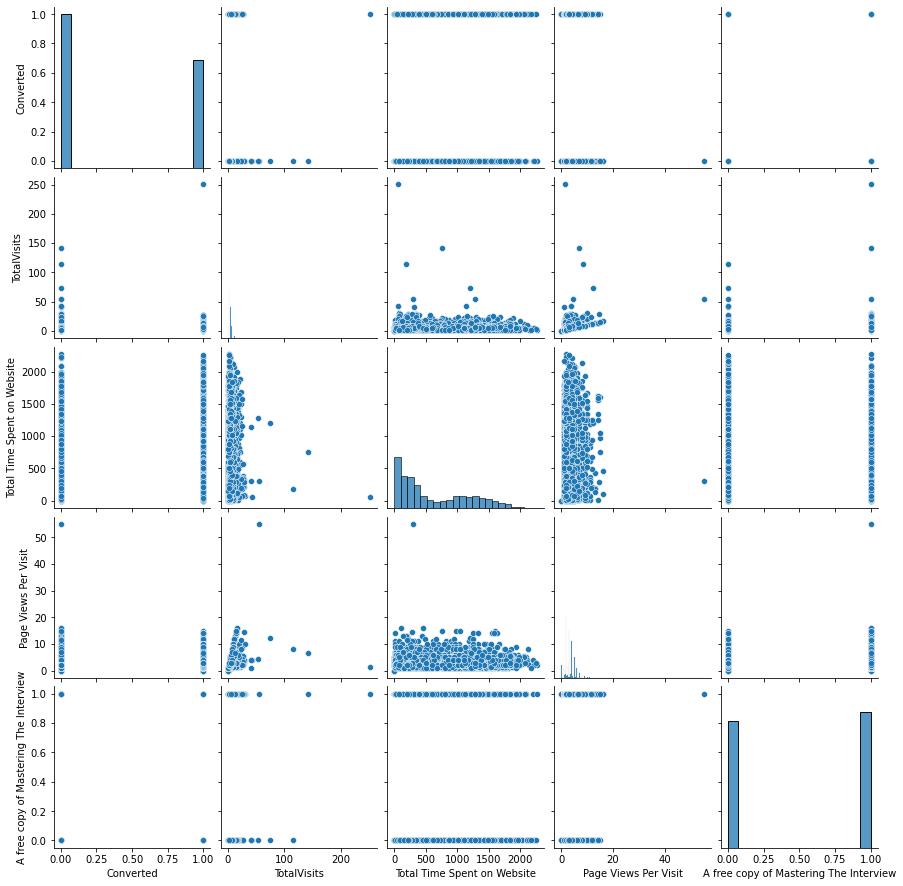

In [179]:
# Getting views of all the variables

sns.pairplot(lead)
plt.show()

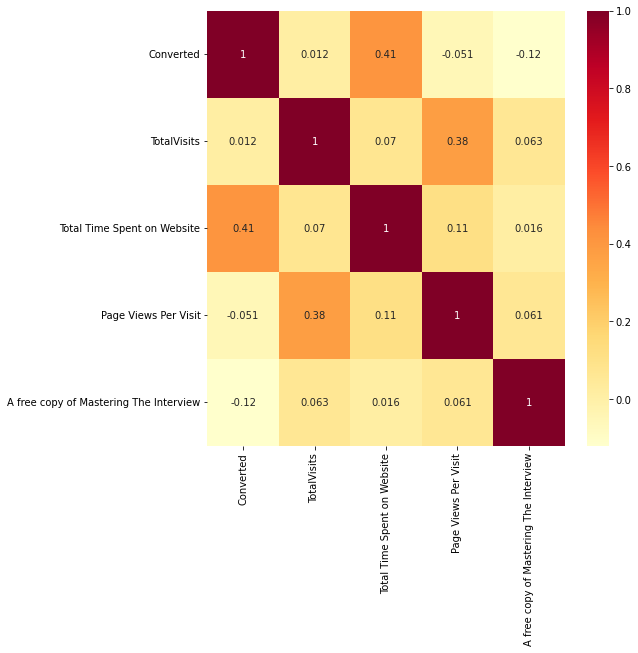

In [180]:
# Correlation heatmap 

plt.figure(figsize=[8,8])
sns.heatmap(lead.corr(), annot=True, cmap='YlOrRd')
plt.show()

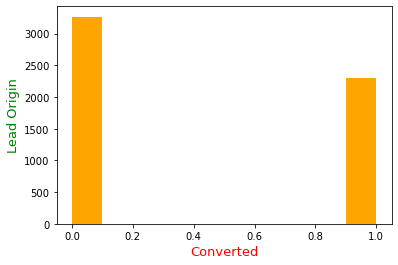

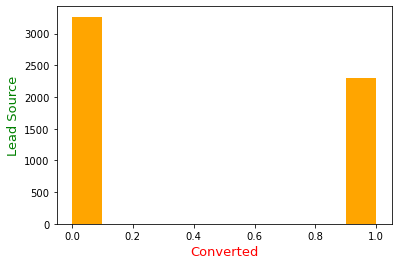

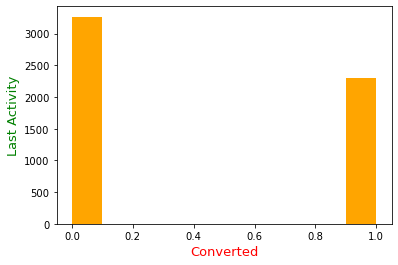

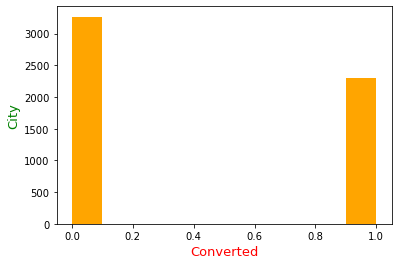

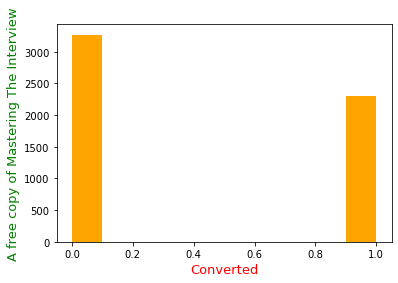

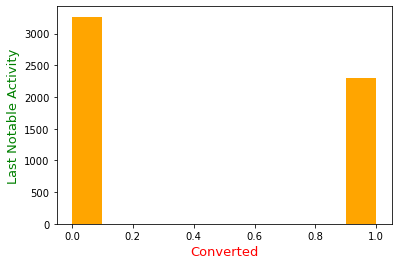

In [181]:
# Viewing Categorical columns

cat_cols = ['Lead Origin','Lead Source','Last Activity','City',
           'A free copy of Mastering The Interview','Last Notable Activity']
for i in cat_cols:
    plt.hist(x=lead.Converted, color = ['Orange'])
    plt.xlabel('Converted', size=13, color='r')
    plt.ylabel(i, size=13, color='g')
    plt.show()


## Getting dummies for categorical variables

In [182]:
# Seeing which column is categorical and which is continuous

lead.nunique()

Lead Origin                                  5
Lead Source                                 18
Converted                                    2
TotalVisits                                 40
Total Time Spent on Website               1625
Page Views Per Visit                       108
Last Activity                               16
Country                                     34
Specialization                              18
What is your current occupation              6
Tags                                        25
City                                         6
A free copy of Mastering The Interview       2
Last Notable Activity                       15
dtype: int64

In [183]:
lead['Country'].value_counts(normalize=True)*100

India                   95.925328
United States            0.915455
United Arab Emirates     0.789804
Saudi Arabia             0.376952
Singapore                0.305152
United Kingdom           0.215401
Australia                0.197451
Qatar                    0.143601
Bahrain                  0.125651
Hong Kong                0.107701
France                   0.107701
Oman                     0.089750
Kuwait                   0.071800
Germany                  0.071800
Nigeria                  0.071800
Canada                   0.053850
South Africa             0.053850
Belgium                  0.035900
Bangladesh               0.035900
Philippines              0.035900
Netherlands              0.035900
Liberia                  0.017950
Vietnam                  0.017950
Denmark                  0.017950
Switzerland              0.017950
Italy                    0.017950
Tanzania                 0.017950
Malaysia                 0.017950
Kenya                    0.017950
Sweden        

- This shows that the countries which are significant for our analysis would be 'India, USA, UAE' 

In [184]:
# Getting only those countries which have significant shares

lead = lead[lead.Country.isin(['India','United States','United Arab Emirates'])]

In [185]:
lead.shape

(5439, 14)

In [186]:
lead['Lead Source'].value_counts(normalize=True)*100

Direct Traffic       42.140099
Google               34.969664
Organic Search       13.256113
Reference             3.989704
Olark Chat            3.346203
Facebook              0.992830
Referral Sites        0.588343
Welingak Website      0.386100
google                0.073543
Click2call            0.073543
bing                  0.036771
Press_Release         0.036771
testone               0.018386
Social Media          0.018386
Pay per Click Ads     0.018386
welearnblog_Home      0.018386
WeLearn               0.018386
NC_EDM                0.018386
Name: Lead Source, dtype: float64

- This shows that only 5 are significant and others would not add value to our analysis

- So dropping those sources which have less than 5% of role 

In [187]:
# Getting significant 'lead source' only

lead = lead[lead['Lead Source'].isin(['Google','Direct Traffic','Olark Chat','Organic Search','Reference'])]
lead.shape

(5314, 14)

In [188]:
# Getting dummy variables for all the categorical variables

dummy1 = pd.get_dummies(lead[['Lead Origin','Lead Source','Last Activity','Country','Specialization',
                         'What is your current occupation','Tags','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
# Concatenating the dataframes

lead_dum = pd.concat([lead, dummy1], axis=1)
lead_dum.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,India,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1,305,1.0,Unreachable,India,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,...,0,0,0,1,0,0,0,0,0,0
6,Landing Page Submission,Google,1,2,1640,2.0,Email Opened,India,Supply Chain Management,Unemployed,...,0,0,0,1,0,0,0,0,0,0
8,Landing Page Submission,Direct Traffic,0,2,71,2.0,Email Opened,India,IT Projects Management,Unemployed,...,0,0,0,0,0,0,0,0,0,0


In [190]:
# Dropping repeated columns

lead_dum = lead_dum.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization',
                         'What is your current occupation',
                        'Tags','City','Last Notable Activity'], axis=1)
lead_dum.shape

(5314, 91)

In [191]:
lead_dum.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,2,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,305,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2,1428,1.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6,1,2,1640,2.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
8,0,2,71,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Checking for outliers

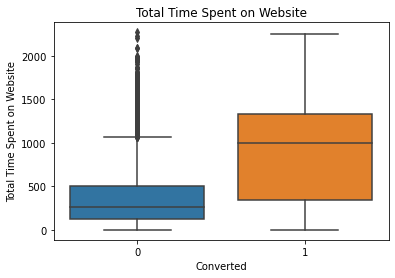

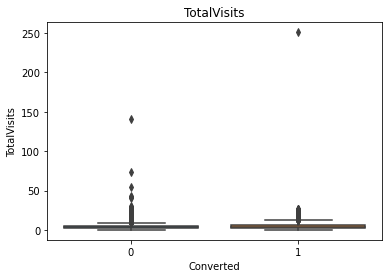

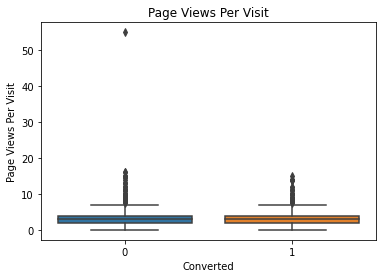

In [192]:
# Visualising continuous variables

cont_cols = ['Total Time Spent on Website','TotalVisits','Page Views Per Visit']
for i in cont_cols:
    sns.boxplot(y=lead[i], x=lead.Converted)
    plt.title(i)
    plt.show()

- So there are outliers in 'TotalVisits' and 'Page view per visit'

In [193]:
# Getting rid of outliers in 'TotalVisits'

lead_dum = lead_dum[~(lead_dum['TotalVisits']>50)]
lead = lead[~(lead['TotalVisits']>50)]

In [194]:
# Getting rid of outliers in 'Page Views Per Visit'

lead_dum = lead_dum[~(lead_dum['Page Views Per Visit']>40)]
lead = lead[~(lead['Page Views Per Visit']>40)]

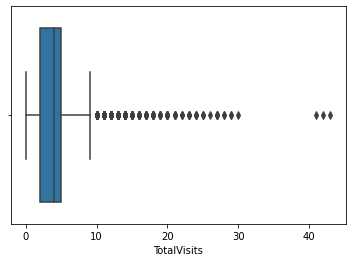

In [195]:
# So, this plot shows we got rid of outliers 
sns.boxplot(lead.TotalVisits)
plt.show()

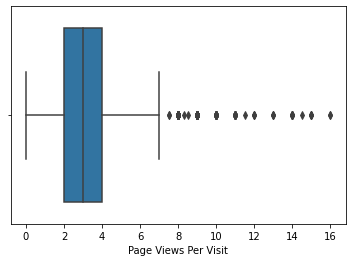

In [196]:
# So, this plot shows we got rid of outliers 

sns.boxplot(lead['Page Views Per Visit'])
plt.show()

In [197]:
 # Final columns
lead.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

# Train-Test split✖️

In [198]:
# Importing libraries

from sklearn.model_selection import train_test_split

In [199]:
# Putting feature variable to X

X = lead_dum.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,2,1532,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,305,1.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,1428,1.0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,2,1640,2.0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8,2,71,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
# Putting response variable to y

y = lead['Converted']

In [201]:
# Splitting the data into train and test


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the continous variables

In [202]:
from sklearn.preprocessing import StandardScaler

In [203]:
# scaling the train dataframe

scaler = StandardScaler()
X_train[['Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']] =  scaler.fit_transform(X_train[[
    'Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
975,-0.138365,1.331375,-0.582589,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5767,-0.699985,-0.675133,-0.582589,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1705,-0.419175,-0.104190,-0.060303,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0.704066,1.017630,0.200840,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,0.423256,-0.397870,-0.060303,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [204]:
# Scaling the test dataframe also

X_test[['Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']] = scaler.transform(X_test[[
    'Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5362,-0.699985,1.887725,-0.582589,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
714,-0.138365,-1.065490,0.461983,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5167,0.423256,1.066881,-0.060303,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3609,2.669738,0.032617,-0.582589,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4133,-0.699985,0.634570,-0.582589,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
# Checking Class imbalance

success = sum(lead_dum.Converted) / len(lead_dum.Converted)*100
success

# so we have the fair enough balanced data 

41.600753295668554

## Model Building

#### First model with 15 variables using RFE

In [206]:
# Importing libraries
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [207]:
# getting 15 variables using RFE 

lr = LogisticRegression()
rfe = RFE(lr,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [208]:
# Getting RFE supported columns only
col = X_train.columns[rfe.support_]

In [209]:
# Getting the model details

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
logm1_model = logm1.fit()
logm1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3716
Model:                            GLM   Df Residuals:                     3700
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1002.8
Date:                Tue, 13 Sep 2022   Deviance:                       2005.7
Time:                        23:31:33   Pearson chi2:                 6.70e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5590
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2904      0.449     -2.872      0.004      -2.171      -0.410
Total Time Spent on Website                              1.1766      0.062     18.859      0.000       1.054       1.299
Lead Origin_Landing Page Submission                     -1.6319      0.185     -8.833      0.000      -1.994      -1.270
Lead Origin_Lead Add Form                                2.7323      0.494      5.532      0.000       1.764       3.700
Last Activity_Email Bounced                             -2.3795      0.518     -4.596      0.000      -3.394      -1.365
What is your current occupation_Unemployed              -1.3862      0.375     -3.697      0.000      -2.121      -0.651
What is your current occupation_Working Professional     1.1930      0.479      2.490      0.013       0.254       2.132
Tags_Busy                                                3.6133      0.383      9.437      0.000       2.863       4.364
Tags_Closed by Horizzon                                  8.2135      1.056      7.779      0.000       6.144      10.283
Tags_Interested in other courses                        -2.8243      1.143     -2.470      0.014      -5.065      -0.583
Tags_Lost to EINS                                        7.7326      0.784      9.869      0.000       6.197       9.268
Tags_Ringing                                            -0.5894      0.379     -1.555      0.120      -1.332       0.153
Tags_Will revert after reading the email                 3.7325      0.286     13.064      0.000       3.173       4.293
Tags_switched off                                       -1.2339      0.798     -1.547      0.122      -2.797       0.330
Last Notable Activity_Had a Phone Conversation          22.7798   1.36e+04      0.002      0.999   -2.67e+04    2.67e+04
Last Notable Activity_SMS Sent                           2.0644      0.144     14.344      0.000       1.782       2.346
========================================================================================================================
"""

In [210]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [211]:
# Checking VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.50
6,What is your current occupation_Working Profes...,3.55
5,What is your current occupation_Unemployed,3.54
12,Tags_Will revert after reading the email,2.45
11,Tags_Ringing,1.86
3,Lead Origin_Lead Add Form,1.60
8,Tags_Closed by Horizzon,1.48
2,Lead Origin_Landing Page Submission,1.46
9,Tags_Interested in other courses,1.27
13,Tags_switched off,1.23


#### Building 2nd model 

In [212]:
# Dropping 'Last Notable Activity_Had a Phone Conversation' because of high p value.(shouldnt be greater than 0.05)

X_train_sm = X_train_sm.drop(['Last Notable Activity_Had a Phone Conversation'], axis=1)

In [213]:
# Getting the model details

X_train_sm = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
logm2_model = logm2.fit()
logm2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3716
Model:                            GLM   Df Residuals:                     3701
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1009.4
Date:                Tue, 13 Sep 2022   Deviance:                       2018.8
Time:                        23:31:33   Pearson chi2:                 6.68e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5575
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3021      0.449     -2.899      0.004      -2.182      -0.422
Total Time Spent on Website                              1.1731      0.062     18.869      0.000       1.051       1.295
Lead Origin_Landing Page Submission                     -1.6226      0.184     -8.814      0.000      -1.983      -1.262
Lead Origin_Lead Add Form                                2.7248      0.494      5.515      0.000       1.757       3.693
Last Activity_Email Bounced                             -2.3927      0.517     -4.629      0.000      -3.406      -1.380
What is your current occupation_Unemployed              -1.3727      0.375     -3.662      0.000      -2.107      -0.638
What is your current occupation_Working Professional     1.1922      0.479      2.488      0.013       0.253       2.131
Tags_Busy                                                3.6105      0.382      9.444      0.000       2.861       4.360
Tags_Closed by Horizzon                                  8.2044      1.056      7.772      0.000       6.135      10.273
Tags_Interested in other courses                        -2.8159      1.142     -2.465      0.014      -5.054      -0.577
Tags_Lost to EINS                                        7.7209      0.783      9.858      0.000       6.186       9.256
Tags_Ringing                                            -0.5857      0.378     -1.548      0.122      -1.327       0.156
Tags_Will revert after reading the email                 3.7406      0.285     13.115      0.000       3.182       4.300
Tags_switched off                                       -1.2297      0.797     -1.543      0.123      -2.792       0.332
Last Notable Activity_SMS Sent                           2.0482      0.144     14.253      0.000       1.767       2.330
========================================================================================================================
"""

In [214]:
# Checking VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.49
6,What is your current occupation_Working Profes...,3.55
5,What is your current occupation_Unemployed,3.54
12,Tags_Will revert after reading the email,2.45
11,Tags_Ringing,1.86
3,Lead Origin_Lead Add Form,1.60
8,Tags_Closed by Horizzon,1.48
2,Lead Origin_Landing Page Submission,1.46
9,Tags_Interested in other courses,1.27
13,Tags_switched off,1.23


#### Building 3rd model 

In [215]:
# Dropping ' Tags_switched off' because of high p value.(shouldnt be greater than 0.05)

X_train_sm = X_train_sm.drop(['Tags_switched off'], axis=1)

In [216]:
X_train_sm = sm.add_constant(X_train_sm)
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
logm3_model = logm3.fit()
logm3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3716
Model:                            GLM   Df Residuals:                     3702
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1010.9
Date:                Tue, 13 Sep 2022   Deviance:                       2021.9
Time:                        23:31:34   Pearson chi2:                 5.90e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5571
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4688      0.449     -3.271      0.001      -2.349      -0.589
Total Time Spent on Website                              1.1763      0.062     18.930      0.000       1.054       1.298
Lead Origin_Landing Page Submission                     -1.6286      0.184     -8.832      0.000      -1.990      -1.267
Lead Origin_Lead Add Form                                2.7348      0.497      5.507      0.000       1.762       3.708
Last Activity_Email Bounced                             -2.3999      0.518     -4.631      0.000      -3.416      -1.384
What is your current occupation_Unemployed              -1.4201      0.380     -3.740      0.000      -2.164      -0.676
What is your current occupation_Working Professional     1.1643      0.485      2.402      0.016       0.214       2.114
Tags_Busy                                                3.8426      0.366     10.496      0.000       3.125       4.560
Tags_Closed by Horizzon                                  8.4230      1.051      8.013      0.000       6.363      10.483
Tags_Interested in other courses                        -2.6179      1.141     -2.295      0.022      -4.854      -0.382
Tags_Lost to EINS                                        7.9413      0.777     10.219      0.000       6.418       9.464
Tags_Ringing                                            -0.3525      0.361     -0.976      0.329      -1.061       0.355
Tags_Will revert after reading the email                 3.9631      0.267     14.869      0.000       3.441       4.485
Last Notable Activity_SMS Sent                           2.0230      0.142     14.226      0.000       1.744       2.302
========================================================================================================================
"""

In [217]:
# Checking VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.77
6,What is your current occupation_Working Profes...,3.55
5,What is your current occupation_Unemployed,3.53
12,Tags_Will revert after reading the email,2.07
11,Tags_Ringing,1.65
3,Lead Origin_Lead Add Form,1.60
2,Lead Origin_Landing Page Submission,1.46
8,Tags_Closed by Horizzon,1.43
9,Tags_Interested in other courses,1.22
7,Tags_Busy,1.16


#### Building 4th model 

In [218]:
# dropping 'Tags_Ringing' because of high p value.(shouldnt be greater than 0.05)

X_train_sm = X_train_sm.drop(['Tags_Ringing'], axis=1)

In [219]:
X_train_sm = sm.add_constant(X_train_sm)
logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
logm4_model = logm4.fit()
logm4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3716
Model:                            GLM   Df Residuals:                     3703
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1011.4
Date:                Tue, 13 Sep 2022   Deviance:                       2022.8
Time:                        23:31:34   Pearson chi2:                 6.13e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5570
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6059      0.434     -3.698      0.000      -2.457      -0.755
Total Time Spent on Website                              1.1751      0.062     18.929      0.000       1.053       1.297
Lead Origin_Landing Page Submission                     -1.6330      0.184     -8.856      0.000      -1.994      -1.272
Lead Origin_Lead Add Form                                2.7269      0.496      5.496      0.000       1.754       3.699
Last Activity_Email Bounced                             -2.4027      0.519     -4.634      0.000      -3.419      -1.386
What is your current occupation_Unemployed              -1.4585      0.383     -3.813      0.000      -2.208      -0.709
What is your current occupation_Working Professional     1.1358      0.488      2.327      0.020       0.179       2.092
Tags_Busy                                                4.0288      0.319     12.636      0.000       3.404       4.654
Tags_Closed by Horizzon                                  8.6013      1.037      8.292      0.000       6.568      10.634
Tags_Interested in other courses                        -2.4439      1.128     -2.166      0.030      -4.655      -0.232
Tags_Lost to EINS                                        8.1203      0.758     10.712      0.000       6.634       9.606
Tags_Will revert after reading the email                 4.1440      0.202     20.502      0.000       3.748       4.540
Last Notable Activity_SMS Sent                           2.0094      0.141     14.233      0.000       1.733       2.286
========================================================================================================================
"""

In [220]:
# Checking VIF's

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.47
6,What is your current occupation_Working Profes...,3.54
5,What is your current occupation_Unemployed,3.51
3,Lead Origin_Lead Add Form,1.60
2,Lead Origin_Landing Page Submission,1.46
11,Tags_Will revert after reading the email,1.35
8,Tags_Closed by Horizzon,1.32
1,Total Time Spent on Website,1.13
9,Tags_Interested in other courses,1.10
12,Last Notable Activity_SMS Sent,1.10


### Now all the p-values are below 0.05 or 5% and all the vif values are less than 5 So it's all sorted 

In [221]:
# Getting predictions for train set

y_train_pred = logm4_model.predict(X_train_sm)
y_train_pred[:5]

975     0.733219
5767    0.004108
1705    0.337181
30      0.655283
108     0.264836
dtype: float64

In [222]:
# Actual y 
y_train[:5]

975     1
5767    0
1705    0
30      1
108     0
Name: Converted, dtype: int64

In [223]:
# Reshaping into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.73321929, 0.0041078 , 0.33718058, 0.6552829 , 0.26483641,
       0.00280851, 0.93550703, 0.01528988, 0.14557857, 0.02191073])

In [224]:
# making dataframe 

y_train_pred_df = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_df['UniqueID'] = y_train.index
y_train_pred_df.head()

,Converted,Converted_Prob,UniqueID
0,1,0.733219,975
1,0,0.004108,5767
2,0,0.337181,1705
3,1,0.655283,30
4,0,0.264836,108


In [225]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_df['Predicted'] = y_train_pred_df.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df.head()

,Converted,Converted_Prob,UniqueID,Predicted
0,1,0.733219,975,1
1,0,0.004108,5767,0
2,0,0.337181,1705,0
3,1,0.655283,30,1
4,0,0.264836,108,0


In [226]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import sklearn
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [227]:
# Getting confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.Predicted )
confusion

array([[1949,  218],
       [ 198, 1351]], dtype=int64)

In [228]:
# Mapping the confusion matrix

TP = confusion[1,1]
TN = confusion[0,0]
FN = confusion[1,0]
FP = confusion[0,1]

In [229]:
# Getting model accuracy

metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.Predicted)

0.8880516684607105

In [230]:
# Checking measures

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
print("Sensitivity is :- ", sensitivity)
print("Specificity is :- ", specificity)

Sensitivity is :-  0.8721755971594577
Specificity is :-  0.8994000922934933


In [231]:
# Checking measues

precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Precision score is :- ", precision)
print("Recall score is :- ", recall)

Precision score is :-  0.8610579987253028
Recall score is :-  0.8721755971594577


In [232]:
# Getting ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

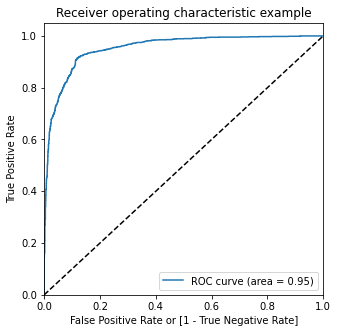

In [233]:
# Getting ROC for our model

draw_roc(y_train_pred_df.Converted, y_train_pred_df.Converted_Prob)

In [234]:
# Getting metrics

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df.Converted, y_train_pred_df.Converted_Prob, drop_intermediate = False )

In [235]:
# Getting values for different points

abc= [0.0,0.1,0.2,0.3,0.4,0.42,0.44,0.46,0.48,0.5,0.6,0.7,0.8,0.9]
for i in abc:
    y_train_pred_df[i]= y_train_pred_df.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Converted,Converted_Prob,UniqueID,Predicted,0.0,0.1,0.2,0.3,0.4,0.42,0.44,0.46,0.48,0.5,0.6,0.7,0.8,0.9
0,1,0.733219,975,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
1,0,0.004108,5767,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.337181,1705,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,1,0.655283,30,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
4,0,0.264836,108,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [236]:
# Getting all measures for our values

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.42,0.44,0.46,0.48,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.416846  1.000000  0.000000
0.10  0.10  0.766416  0.983215  0.611444
0.20  0.20  0.841496  0.950936  0.763267
0.30  0.30  0.887783  0.923822  0.862021
0.40  0.40  0.895318  0.913493  0.882326
0.42  0.42  0.894510  0.908328  0.884633
0.44  0.44  0.894779  0.904454  0.887863
0.46  0.46  0.887244  0.881859  0.891094
0.48  0.48  0.887244  0.876695  0.894785
0.50  0.50  0.888052  0.872176  0.899400
0.60  0.60  0.879171  0.812782  0.926627
0.70  0.70  0.863025  0.734668  0.954776
0.80  0.80  0.846071  0.665591  0.975081
0.90  0.90  0.803014  0.546159  0.986617


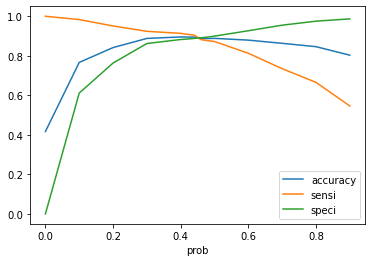

In [237]:
# Plotting measures

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### We need that model which can efficiently predict those who are willing to enroll with X Education and predicted as hot lead so that can be ensured by choosing high sensitivity model 

#### So we can say by seeing the prob, accuracy, sensi, speci chart that the 0.42 is correct cutoff in our case

In [238]:
y_train_pred_df.head()

,Converted,Converted_Prob,UniqueID,Predicted,0.0,0.1,0.2,0.3,0.4,0.42,0.44,0.46,0.48,0.5,0.6,0.7,0.8,0.9
0,1,0.733219,975,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
1,0,0.004108,5767,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.337181,1705,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,1,0.655283,30,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
4,0,0.264836,108,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [239]:
# Getting final prediction based on our cutoff 0.42

y_train_pred_df['Final Predicted'] = y_train_pred_df.Converted_Prob.map(lambda x : 1 if x>0.42 else 0)
y_train_pred_df.head()

,Converted,Converted_Prob,UniqueID,Predicted,0.0,0.1,0.2,0.3,0.4,0.42,0.44,0.46,0.48,0.5,0.6,0.7,0.8,0.9,Final Predicted
0,1,0.733219,975,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.004108,5767,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.337181,1705,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.655283,30,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.264836,108,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [240]:
# Accuracy score for train set 
accuracy_train = metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df['Final Predicted'])
accuracy_train

0.8945102260495156

In [241]:
# Getting confusion matrix for train set 
confusion2 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df['Final Predicted'])
confusion2

array([[1917,  250],
       [ 142, 1407]], dtype=int64)

In [242]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [243]:
# Let's see the sensitivity of our logistic regression model

sensitivity_train = TP / float(TP+FN)
print("The Sensitivity of our model is:-", sensitivity_train)

The Sensitivity of our model is:- 0.908327953518399


In [244]:
# Let us calculate specificity

specificity_train = TN / float(TN+FP)
print("The Specificity of our model is:-", specificity_train)

The Specificity of our model is:- 0.8846331333640979


In [245]:
# Calculate false postive rate - predicting cold leads as hot leads
print(FP/ float(TN+FP))

0.11536686663590216


In [246]:
# Positive predictive value 

print (TP / float(TP+FP))

0.8491249245624622


In [247]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9310344827586207


In [248]:
# Prescision score for train set 

precision_train = metrics.precision_score(y_true = y_train_pred_df.Converted, y_pred=y_train_pred_df['Final Predicted'])
print("The precision score is:-", precision_train)

The precision score is:- 0.8491249245624622


In [249]:
# Recall
recall_train = metrics.recall_score(y_true = y_train_pred_df.Converted, y_pred=y_train_pred_df['Final Predicted'])
print("The recall score is:-", recall_train)

The recall score is:- 0.908327953518399


In [250]:
# precision-recall curve metric

metrics.precision_recall_curve(y_true=y_train_pred_df.Converted, probas_pred=y_train_pred_df['Converted_Prob'])


(array([0.43757062, 0.4374117 , 0.43753533, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99354422e-01, 9.99354422e-01, ...,
        1.29115558e-03, 6.45577792e-04, 0.00000000e+00]),
 array([0.00131155, 0.00131617, 0.00135083, ..., 0.99999399, 0.9999963 ,
        0.99999806]))

In [251]:
# F-1 score
f1_score_train = metrics.f1_score(y_true=y_train_pred_df.Converted, y_pred=y_train_pred_df['Final Predicted'])
print("The f1_score for the train set is:-", f1_score_train)

The f1_score for the train set is:- 0.8777292576419214


#### Getting precision recall tradeoff

In [252]:
from sklearn.metrics import precision_recall_curve

In [253]:
p, r, thresholds = precision_recall_curve(y_true=y_train_pred_df.Converted, probas_pred=y_train_pred_df.Converted_Prob)

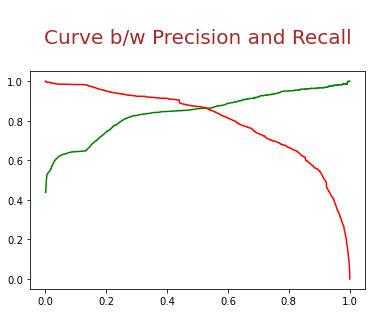

In [254]:
# Getting plot b/w precision and recall
plt.plot(thresholds, p[:-1], "g")
plt.plot(thresholds, r[:-1], "r")
plt.title("\nCurve b/w Precision and Recall\n", size=20,c='brown')
plt.show()

## Making predictions on test set

In [255]:
# Adding constatnt
X_test_sm = sm.add_constant(X_test)

In [256]:
# Getting the same columns 
X_test_sm = X_test_sm[X_train_sm.columns]

In [257]:
# getting head
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last Activity_Email Bounced,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
5362,1.0,1.887725,1,0,0,1,0,0,0,0,0,1,1
714,1.0,-1.065490,1,0,0,1,0,0,0,0,0,1,0
5167,1.0,1.066881,0,0,0,1,0,0,0,0,0,1,1
3609,1.0,0.032617,1,0,0,1,0,0,0,0,0,1,1
4133,1.0,0.634570,1,0,0,1,0,0,0,0,0,1,0


In [258]:
# Predicting based on 9th model 
y_test_pred = logm4_model.predict(X_test_sm)
y_test_pred[:5]

5362    0.975258
714     0.141185
5167    0.987165
3609    0.816724
4133    0.547907
dtype: float64

In [259]:
y_test[:5]

5362    1
714     0
5167    1
3609    1
4133    1
Name: Converted, dtype: int64

In [260]:
# reshaping 
y_test_pred = y_test_pred.values.reshape(-1)

In [261]:
# Making dataframe
y_test_df = pd.DataFrame({'Converted': y_test.values, 'Converted_prob': y_test_pred})
y_test_df['UniqueID'] = y_test.index
y_test_df.head()

,Converted,Converted_prob,UniqueID
0,1,0.975258,5362
1,0,0.141185,714
2,1,0.987165,5167
3,1,0.816724,3609
4,1,0.547907,4133


In [262]:
# Final prediction based on final cutoff
y_test_df['Final Predicted'] = y_test_df.Converted_prob.map(lambda x : 1 if x>0.42 else 0)
y_test_df.head()

,Converted,Converted_prob,UniqueID,Final Predicted
0,1,0.975258,5362,1
1,0,0.141185,714,0
2,1,0.987165,5167,1
3,1,0.816724,3609,1
4,1,0.547907,4133,1


In [263]:
# accuracy 
accuracy_test = metrics.accuracy_score(y_true=y_test, y_pred=y_test_df['Final Predicted'])
print("The accuracy for the test set is:-", accuracy_test)

The accuracy for the test set is:- 0.8913998744507219


In [264]:
# confusion matrix for test set 
confusion_test = metrics.confusion_matrix(y_test, y_test_df['Final Predicted'])
confusion_test

array([[814, 119],
       [ 54, 606]], dtype=int64)

In [265]:
# test set readings
TN = confusion_test[0,0]
TP = confusion_test[1,1]
FN = confusion_test[1,0]
FP = confusion_test[0,1]

In [266]:
# Let's see the sensitivity of our logistic regression model

sensitivity_test = TP / float(TP+FN)
print("The sensitivity for our test set is:-", sensitivity_test)

The sensitivity for our test set is:- 0.9181818181818182


In [267]:
# Let us calculate specificity

specificity_test = TN / float(TN+FP)
print("The Specificity for our test set is:-", specificity_test)

The Specificity for our test set is:- 0.872454448017149


In [268]:
# Precision
precision_test = precision_score(y_true=y_test, y_pred=y_test_df['Final Predicted'])
print("The precision score for test set is:-",precision_test)

The precision score for test set is:- 0.8358620689655173


In [269]:
# recall
recall_test = recall_score(y_true=y_test, y_pred=y_test_df['Final Predicted'])
print("The recall score for test set is:-",recall_test)

The recall score for test set is:- 0.9181818181818182


In [270]:
print("The Recall score for train set is:-",recall_train)
print("The Recall score for test set is:-", recall_test)

The Recall score for train set is:- 0.908327953518399
The Recall score for test set is:- 0.9181818181818182


In [271]:
print("The precision score for train set is:-",precision_train)
print("The precision score for test set is:-", precision_test)

The precision score for train set is:- 0.8491249245624622
The precision score for test set is:- 0.8358620689655173


In [272]:
print("The specificity for train set is:-",specificity_train)
print("The specificity for test set is:-", specificity_test)

The specificity for train set is:- 0.8846331333640979
The specificity for test set is:- 0.872454448017149


In [273]:
print("The sensitivity for train set is:-",sensitivity_train)
print("The sensitivity for test set is:-", sensitivity_test)

The sensitivity for train set is:- 0.908327953518399
The sensitivity for test set is:- 0.9181818181818182


### So this confirms that we got the almost same accuracy, precision, recall, sensitivity, specificity for both train and test sets 

#### We used 0.42 cutoff:- Train & Test set

# Now getting lead score for Train & Test sets

In [274]:
# Train set head
X_train_sm.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last Activity_Email Bounced,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
975,1.0,1.331375,1,0,0,1,0,0,0,0,0,1,0
5767,1.0,-0.675133,1,0,0,1,0,0,0,0,0,0,0
1705,1.0,-0.104190,1,0,0,1,0,0,0,0,0,1,0
30,1.0,1.017630,1,0,0,1,0,0,0,0,0,1,0
108,1.0,-0.397870,1,0,0,1,0,0,0,0,0,1,0


In [275]:
# Predicted y for train set
y_train_pred_df.head()

,Converted,Converted_Prob,UniqueID,Predicted,0.0,0.1,0.2,0.3,0.4,0.42,0.44,0.46,0.48,0.5,0.6,0.7,0.8,0.9,Final Predicted
0,1,0.733219,975,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.004108,5767,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.337181,1705,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.655283,30,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.264836,108,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [276]:
# Getting unique id from index number
X_train_sm['UniqueID'] = X_train_sm.index

In [277]:
# Getting lead score by multiplying the probabilityby 100

score = pd.DataFrame({'Lead Score':y_train_pred_df['Converted_Prob']*100})
score.head()

,Lead Score
0,73.321929
1,0.410780
2,33.718058
3,65.528290
4,26.483641


In [278]:
# Rounding the lead score
score['Lead Score'] = round(score['Lead Score'],1)
score.head()

,Lead Score
0,73.3
1,0.4
2,33.7
3,65.5
4,26.5


In [279]:
# Getting uniqueid for merging 
score['UniqueID'] = X_train_sm.index
score.head()

,Lead Score,UniqueID
0,73.3,975
1,0.4,5767
2,33.7,1705
3,65.5,30
4,26.5,108


In [280]:
# Merging dataframes to make a final df with lead score
X_train_sm = pd.merge(X_train_sm, score, on = 'UniqueID', how='inner')
X_train_sm.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last Activity_Email Bounced,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent,UniqueID,Lead Score
0,1.0,1.331375,1,0,0,1,0,0,0,0,0,1,0,975,73.3
1,1.0,-0.675133,1,0,0,1,0,0,0,0,0,0,0,5767,0.4
2,1.0,-0.104190,1,0,0,1,0,0,0,0,0,1,0,1705,33.7
3,1.0,1.017630,1,0,0,1,0,0,0,0,0,1,0,30,65.5
4,1.0,-0.397870,1,0,0,1,0,0,0,0,0,1,0,108,26.5


In [281]:
# test set unique id
X_test_sm['UniqueID'] = X_test_sm.index

In [282]:
# Getting lead score for test set
score2 = pd.DataFrame({'Lead Score':y_test_df['Converted_prob']*100})
score2.head()

,Lead Score
0,97.525807
1,14.118450
2,98.716495
3,81.672364
4,54.790677


In [283]:
# Rounding lead score
score2['Lead Score'] = round(score2['Lead Score'],1)
score2.head()

,Lead Score
0,97.5
1,14.1
2,98.7
3,81.7
4,54.8


In [284]:
# Getting unique id from  index 
score2['UniqueID'] = X_test_sm.index
score2.head()

,Lead Score,UniqueID
0,97.5,5362
1,14.1,714
2,98.7,5167
3,81.7,3609
4,54.8,4133


In [285]:
# Merging the test set 

X_test_sm = pd.merge(X_test_sm, score2, on = 'UniqueID', how='inner')
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last Activity_Email Bounced,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent,UniqueID,Lead Score
0,1.0,1.887725,1,0,0,1,0,0,0,0,0,1,1,5362,97.5
1,1.0,-1.065490,1,0,0,1,0,0,0,0,0,1,0,714,14.1
2,1.0,1.066881,0,0,0,1,0,0,0,0,0,1,1,5167,98.7
3,1.0,0.032617,1,0,0,1,0,0,0,0,0,1,1,3609,81.7
4,1.0,0.634570,1,0,0,1,0,0,0,0,0,1,0,4133,54.8


# Summary:- 

## Train set:- 
- Accuracy:- 0.8945
- Specificity:- 0.8846
- Sensitivity/Recall:-0.9083
- Precision:- 0.8491


## Test Set:- 
- Accuracy:-0.8914
- Specificity:-0.8724
- Sensitivity/Recall:-0.9181
- Precision:- 0.8358


 The model seems to predict the Conversion rate very well and we could be able to give the CEO confidence in making good calls based on this model .